[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/azad-academy/MLBasics-Regression/blob/main/ml-regression.ipynb)

# Regression in Machine Learning
#### Author : J. Rafid Siddiqui (jrs@azaditech.com)


## Pre-requisites and Imports

In [ ]:
!pip install scikit-learn

In [1]:
import sklearn
from sklearn.datasets import *
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel, Matern, RBF, DotProduct, RationalQuadratic, ExpSineSquared
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.linear_model import LogisticRegression
from utils import *

# Data Preparation

In [2]:
#Generating Random Data
seed = 10
rstate = np.random.RandomState(1)
X,Y = make_friedman3(100,noise=0.05,random_state=rstate) 

pca = PCA(n_components=3)  #Data is in more than 3 dimensions and too complex for simple regression fitting; We use PCA to simplify the data for the sake of learning the regression concept.
PCA_X = pca.fit_transform(X)    
X = PCA_X[:,0]/np.linalg.norm(PCA_X[:,0]) #Taking only Principal component
X = X.reshape((len(X),1))

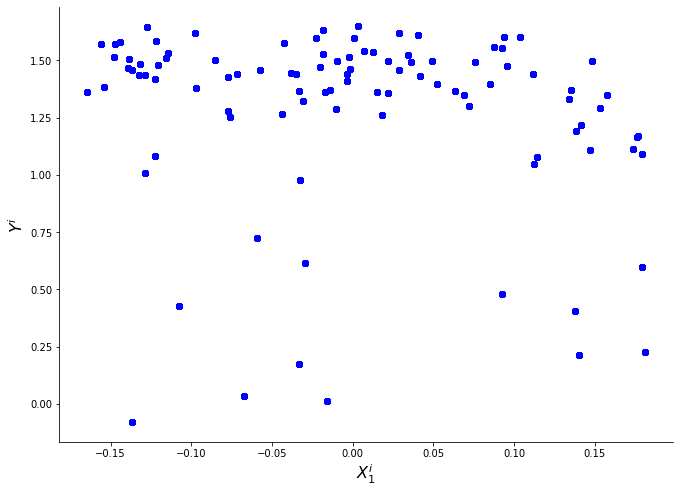

In [4]:
plot_data(X,Y,colors='b')  

# Linear Regression

## By Solving System of Linear Equations
\begin{equation}
\color{Red} {X={\begin{bmatrix}  
x_1^1,x_2^1,...,x_d^1,1\\ 
x_1^2,x_2^2,...,x_d^2,1\\ 
\vdots \\ 
x_1^n,x_2^n,...,x_d^n ,1 
\end{bmatrix}^{nx(d+1)}}      , \omega = \begin{bmatrix}
\omega_1\\ 
\omega_2\\ 
\vdots\\ 
\omega_d \\
c
\end{bmatrix}^{(d+1)x1}    ,   Y = \begin{bmatrix}
y_1\\ 
y_2\\ 
\vdots\\ 
y_n
\end{bmatrix}^{nx1} }    \\ \\
\color{Red} {Y = X \omega } \\ \\
\color{Red} {=> X^TY = X^TX \omega } \\ \\
\color{Red} {=> \omega  = (X^TX)^{-1}X^TY } \\ \\
\end{equation}

In [5]:
X_hat = np.concatenate((X,np.ones((len(X),1))),axis=1) # Adding the extra dimension for the coefficient of bias term

K = np.transpose(X_hat)@ X_hat      # computing symmetric covariance matrix
X_T_Y = np.transpose(X_hat) @ Y 

K_inv = np.linalg.inv(K)     # Solving the linear equations by matrix inverse

w = K_inv @ X_T_Y       # computing the weights

print(w)

[-0.65697998  1.28122884]


In [6]:
y_hat = X_hat @ w

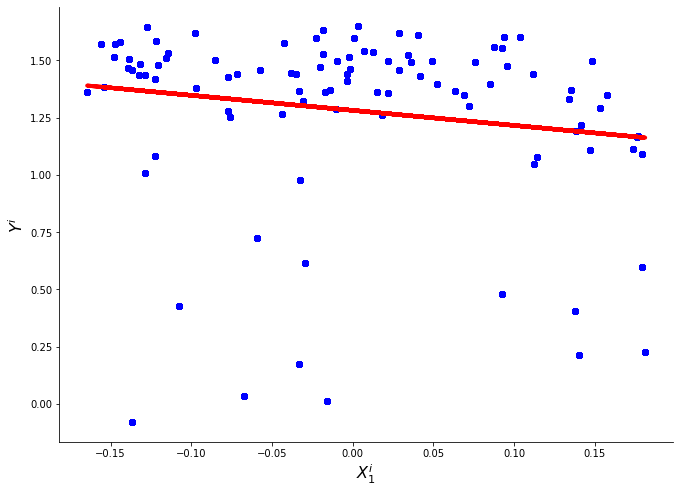

In [7]:
model_pts = assemble_points(X[:,0],y_hat)
plot_data(X[:,0],Y,model_pts,colors='b')

## Using Linear Regression Function

In [8]:
# Regression Fitting with Gradient Descent 
X_hat = X.reshape(-1,1)

LReg = linear_model.LinearRegression()

LReg.fit(X_hat, Y)

LinearRegression()

In [9]:
y_hat = LReg.predict(X_hat)    #Predicting the values based on the model

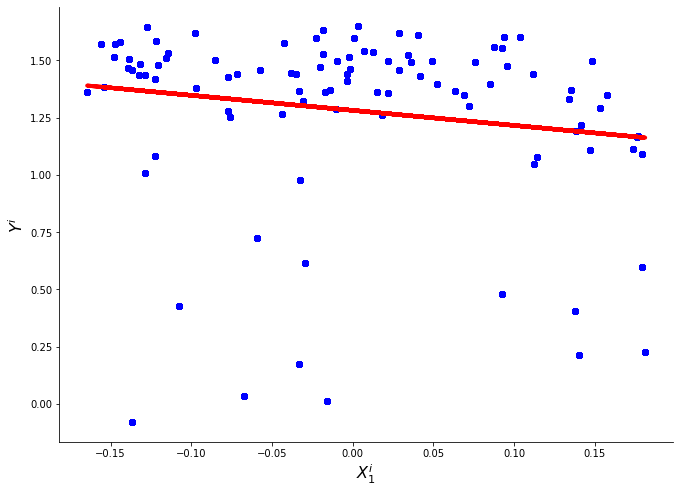

In [10]:
model_pts = assemble_points(X[:,0],y_hat)
plot_data(X[:,0],Y,model_pts,colors='b')

## By Gradient Descent

In [11]:
LReg = linear_model.SGDRegressor()

In [12]:
LReg.fit(X,Y)
y_hat = LReg.predict(X)

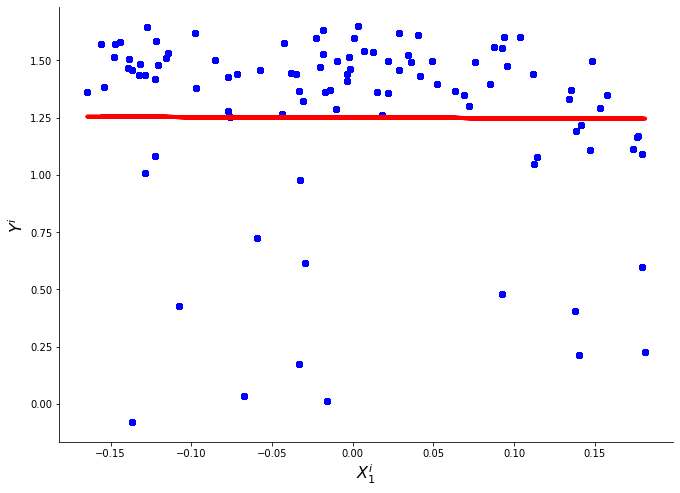

In [13]:
model_pts = assemble_points(X,y_hat)
plot_data(X,Y,model_pts,colors='b')

## Non-Linear Regression


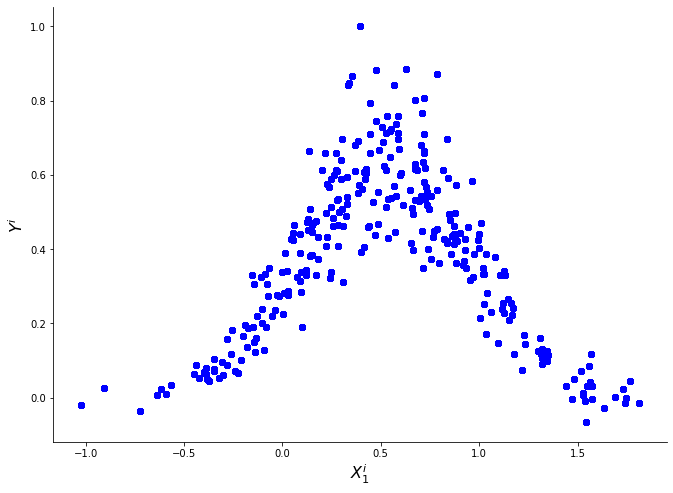

In [15]:
np.random.seed(0)
X, Y = gen_non_linear_data(300)

plot_data(X,Y,colors='b')

## Polynomial Regression
\begin{equation}
\color{Red} {Y = \omega_1.x_1 + \omega_2.x^2_2 + \omega_3.x^3_3 + ...} \\ \\
\color{Red} {X^i={\begin{bmatrix}  
x_1^i,x_2^i,...,x_d^i,1\\ 
\end{bmatrix}}      , \omega^i = \begin{bmatrix}
\omega_1\\ 
\omega_2x\omega_2\\ 
\vdots\\ 
\omega_dx\omega_d ... x\omega_d \\
c
\end{bmatrix}    ,   Y = \begin{bmatrix}
y_1\\ 
y_2\\ 
\vdots\\ 
y_n
\end{bmatrix} }    \\ \\
\end{equation}

In [16]:
polynomial = PolynomialFeatures(degree=4, include_bias=False)
X_hat = polynomial.fit_transform(X)

LR = linear_model.LinearRegression()
LR.fit(X_hat, Y)

y_hat = LR.predict(X_hat)

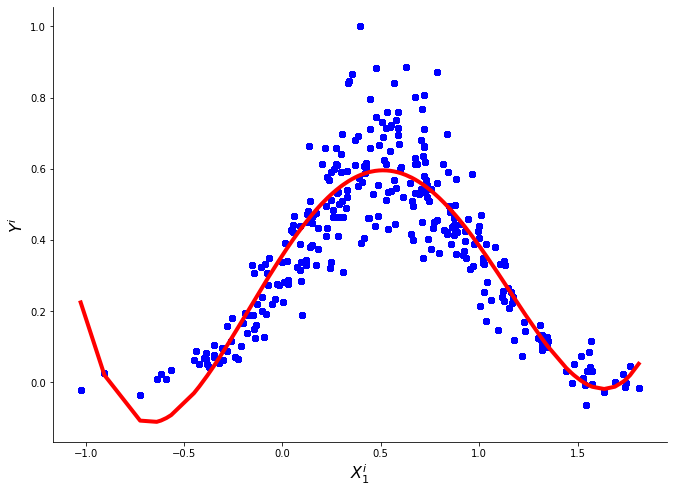

In [17]:
indices = np.argsort(X[:,0],axis=0)
X_sorted = np.array(X)[indices]

model_pts = assemble_points(X_sorted,y_hat[indices])
plot_data(X,Y,model_pts,colors='b')

## Gaussian Process Regression

\begin{equation}
\color{Red} {Y_i = (\hat\mu_i-X_i)*\hat\sigma_i } \\ \\
\color{Red} {\hat{Y_i} = \mathcal{K}(\hat\mu_i(X_i),\hat\sigma_i(X_i)) } \\ \\
\end{equation}


In [18]:
kernels = [1.0*RBF(length_scale=1, length_scale_bounds=(1e-06, 1e6)),
           RBF(length_scale=1)+WhiteKernel(noise_level=0.1),
           1.0*RationalQuadratic(length_scale=1, alpha=0.1**2),
           1.0*ExpSineSquared(length_scale=1, periodicity=3.0,
                                length_scale_bounds=(1e-06, 1e5),
                                periodicity_bounds=(1.0, 10.0)),
           C(0.1, (0.01, 10.0))*(DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2),
           1.0**2*Matern(length_scale=1, length_scale_bounds=(1e-06, 1e5),
                        nu=0.5)
          ] 

In [19]:
kernel = 1 * RBF(length_scale=1, length_scale_bounds=(1e-5, 1e2)) 
NLReg = gaussian_process.GaussianProcessRegressor(kernel=kernels[0],alpha=0.05,n_restarts_optimizer=10)

NLReg.fit(X,Y)

GaussianProcessRegressor(alpha=0.05, kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10)

In [20]:
y_hat_mean,y_hat_std = NLReg.predict(X, return_std=True)

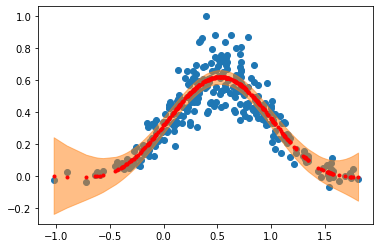

In [21]:
plot_gaussian(X,Y,y_hat_mean,y_hat_std)

D:\Anaconda\envs\mlai\lib\site-packages\sklearn\gaussian_process\kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
D:\Anaconda\envs\mlai\lib\site-packages\sklearn\gaussian_process\kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


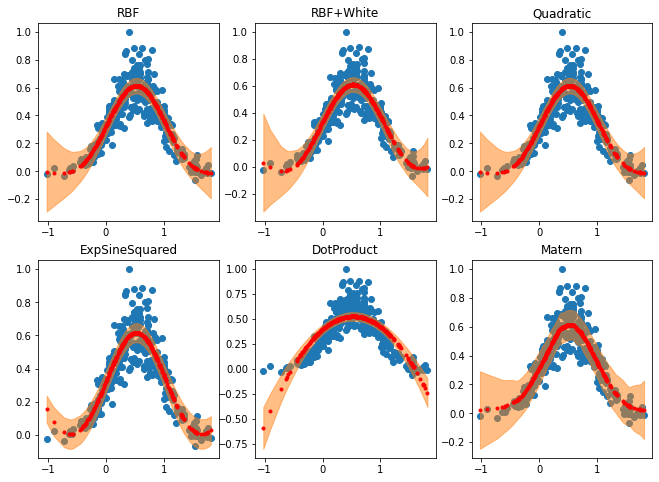

In [22]:
fig,axes = plt.subplots(2,3,figsize=(11,8))
axis_titles = ['RBF','RBF+White','Quadratic','ExpSineSquared','DotProduct','Matern']

for i in range(6):
    
    NLReg = gaussian_process.GaussianProcessRegressor(kernel=kernels[i],alpha=0.3**2,n_restarts_optimizer=10)
    NLReg.fit(X,Y)
    y_hat_mean,y_hat_std = NLReg.predict(X, return_std=True)
    
    plot_gaussian(X,Y,y_hat_mean,y_hat_std,canvas=axes[int(i/3)][i-int(i/3)*3],title=axis_titles[i])

# Logistic Regression


\begin{equation}
\color{Red} {\arg \min_{\omega}\mathcal{J}(\omega) = -Ylog(\hat{Y}(X_i,\omega)) - (1-Y)log(1-\hat{Y}(X_i,\omega)) + \lambda \sum_j\omega_j^2}\\ \color{Red} {=> \mathcal{J}(X_i,\omega)= \begin{cases}
-log(\hat{Y}) & \text{ if } Y= 1\\ 
-log(1-\hat{Y}) & \text{ if } Y= 0
\end{cases} } \\
\color{Red} { \hat{Y}(X_i,\omega) = \frac{1}{1+e^{-\omega^TX_i}} } \\ 
\end{equation}


In [23]:
rstate = np.random.RandomState(1)
data = sklearn.datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,random_state=rstate)
X = data[0]
Y = data[1]

#Splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

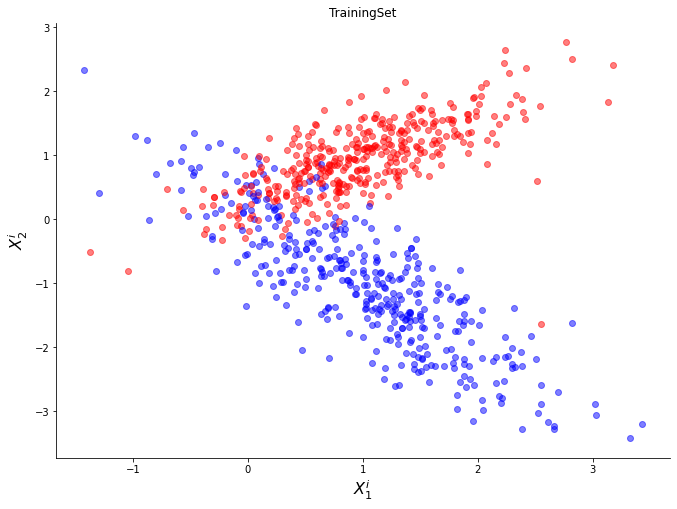

In [24]:
plot_data(X_train,1*Y_train,classification=True,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['r','b'],plt_title="TrainingSet")

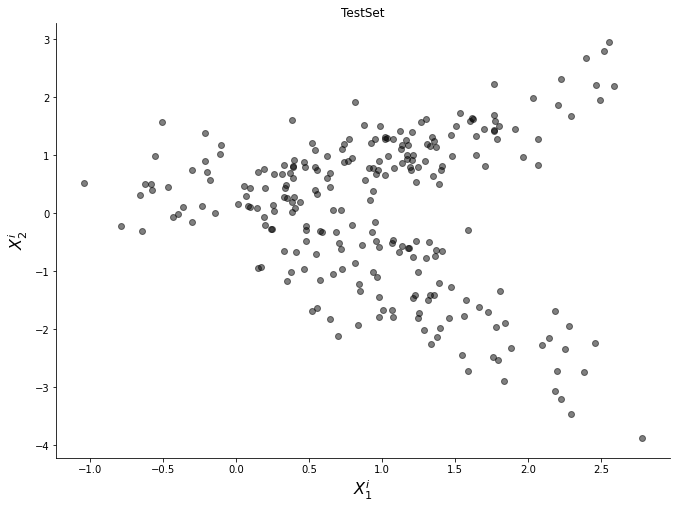

In [25]:
plot_data(X_test,np.zeros((len(X_test),),dtype=int),classification=True,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k'],plt_title="TestSet")

In [26]:
LogReg = LogisticRegression(random_state=10)
LogReg.fit(X_train,Y_train)

LogisticRegression(random_state=10)

In [27]:
Y_pred = LogReg.predict(X_test)

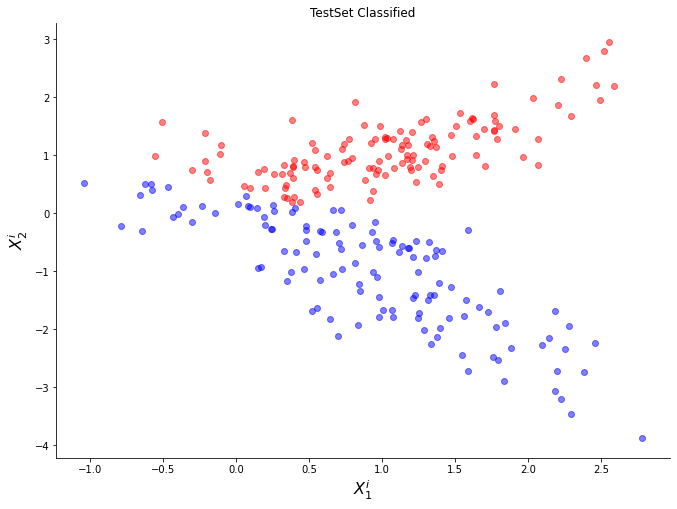

In [28]:
plot_data(X_test,1*Y_pred,classification=True,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['r','b'],plt_title="TestSet Classified")